# DS 3000 - Assignment 11

**Student Name**: Regina Rabkina

**Date**: 11/16/23

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer


## Part 1: 

Loading the dataset “diabetes.csv”, viewing the dimensions of the data, and gathering summary statistics.

In [2]:
#load the dataset
diabetes_df = pd.read_csv('diabetes.csv')

#print the dimensions of the data
print("Dimensions of the data:", diabetes_df.shape)

# Define which columns need rounding (assuming all columns are numeric)
numeric_columns = diabetes_df.select_dtypes(include='number').columns

# Round numeric columns to 2 decimal places
diabetes_df[numeric_columns] = diabetes_df[numeric_columns].round(2)

#print the summary statistics
summary_stats = diabetes_df.describe().round(2)
print(summary_stats)


Dimensions of the data: (768, 9)
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%      

Pregnancies: On average, the individuals in this dataset have had about 3.84 pregnancies, but it ranges widely from 0 to 17.

Glucose: The average glucose level is around 120.89 mg/dL, with a standard deviation of approximately 31.97. The minimum value of 0 seems like a missing or erroneous entry since glucose levels normally don't reach zero.

BloodPressure: The mean blood pressure is approximately 69.11 mmHg, with a standard deviation of about 19.36. The minimum value of 0 also appears as an anomaly since normal blood pressure values wouldn't be zero.

SkinThickness: The mean skin thickness is around 20.54 mm, with a minimum value of 0, which might indicate missing or incorrect data since skin thickness can't be zero.

Insulin: The average insulin level is about 79.80, but the standard deviation is quite high at approximately 115.24. There are also values of 0 which could indicate missing data.

BMI: The average BMI is around 31.99, which falls into the category of obesity. There's a minimum value of 0, which seems implausible for BMI.

DiabetesPedigreeFunction: This shows an average diabetes pedigree function value of about 0.47. It represents the likelihood of diabetes based on family history.

Age: The average age is around 33.24 years, ranging from 21 to 81.

Outcome: This seems to be a binary categorical variable (0 or 1) indicating whether an individual has diabetes (1) or not (0).

## Part 2: 
Creating visualizations to demonstrate univariate patterns in the data.

### Univariate - BMI visualization

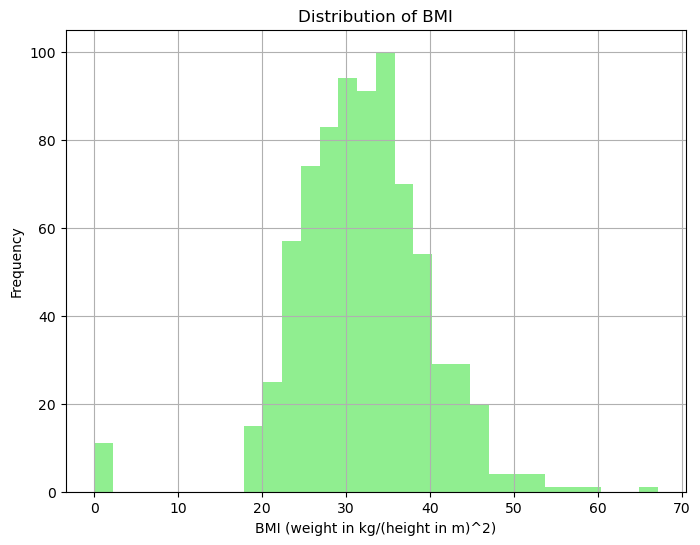

In [3]:
#histogram for BMI
plt.figure(figsize=(8, 6))
plt.hist(diabetes_df['BMI'], bins=30, color='lightgreen')
plt.xlabel('BMI (weight in kg/(height in m)^2)')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.grid(True)
plt.show()

#### Observations: 
The distribution of BMI is clustered around the 20-40 range, with a peak frequency at around 36. The distribution is rather normal, since the data near the mean (31.99) are more frequent in occurrence.

### Univariate - Glucose visualization

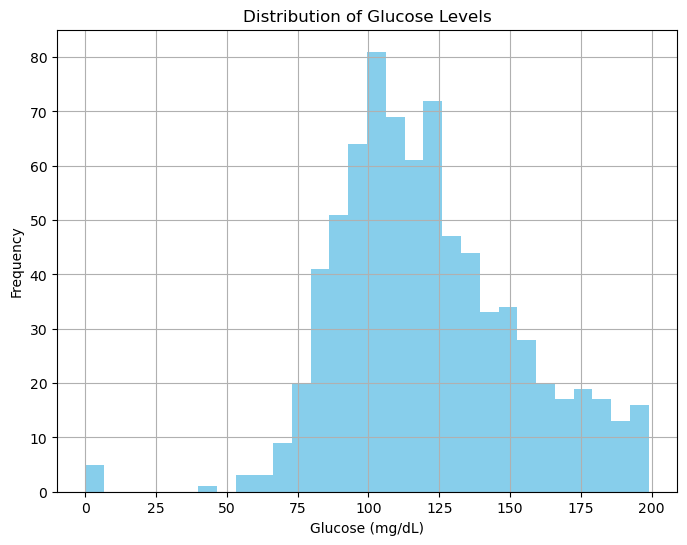

In [4]:
#histogram for Glucose
plt.figure(figsize=(8, 6))
plt.hist(diabetes_df['Glucose'], bins=30, color='skyblue')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels')
plt.grid(True)
plt.show()

#### Observations: 
The distribution of glucose is clustered around the 80-125 range, with a peak frequency at around 100. The distribution is positively skewed, with the tail being more pronounced on the right side.

### Correlation Matrix

In [5]:
# Creating the correlation matrix
correlation_matrix = diabetes_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.034107  0.136826       0.041600       0.184145   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.034107   
Glucose              

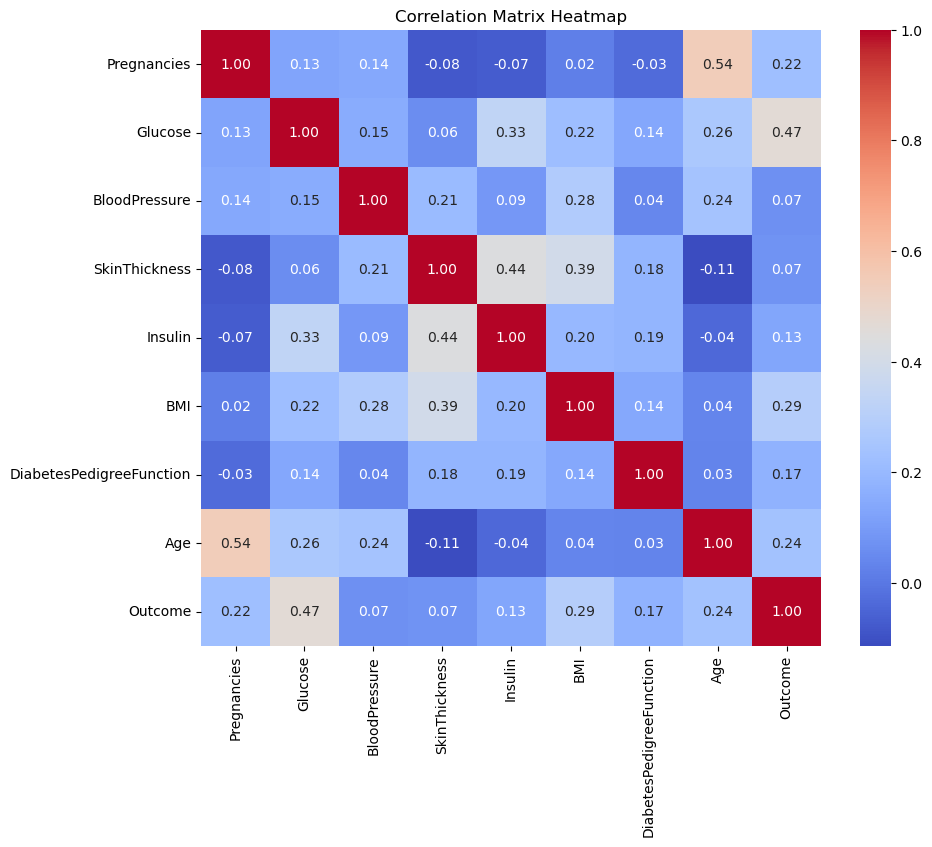

In [6]:
#creating the correlation matrix
correlation_matrix = diabetes_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

Some notable correlations:
1) There is a relatively strong positive correlation between Age and Pregnancies (0.54)
2) There is also a relatively strong positive correlation between Glucose and Outcome (0.47)
3) There are negative correlations between Pregnancies and SkinThickness, Insulin, DiabetesPedigreeFunction.
4) There also are negative correlations between Age and SkinThickness, Insulin.

## Part 3:
Evaluating and preparing the data for missing or invalid values


In [7]:
#check for missing values
missing_values = diabetes_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There don't seem to be any missing values in the data set.

As noted earlier, certain columns such as Glucose, BloodPressure, Insulin, BMI, and SkinThickness have minimum values of 0, which does not make sense in this context. 

In [8]:
#define columns with potentially invalid values (where zero might be invalid)
columns_with_invalid_values = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']

#count the number of zeros in the specified columns
invalid_counts = (diabetes_df[columns_with_invalid_values] == 0).sum()
print("Counts of Invalid Values:")
print(invalid_counts)

Counts of Invalid Values:
Glucose            5
BloodPressure     35
BMI               11
Insulin          374
SkinThickness    227
dtype: int64


Based on the correlation matrix, there is only high correlation between Glucose and Outcome. Furthermore, the invalid counts of BloodPressure and BMI are relatively low, so the invalid values will be imputed with the mean of their respective columns.

In [9]:
#impute mean for variables with a small number of invalid values
columns_to_impute = ['Glucose', 'BloodPressure', 'BMI']

#impute with mean
for col in columns_to_impute:
    # calculate mean excluding invalid values (assuming invalid values are 0)
    col_mean = diabetes_df[col][diabetes_df[col] != 0].mean()
    
    #replace invalid values with mean
    diabetes_df[col] = diabetes_df[col].replace(0, col_mean)

For the rest of the invalid values, since there is a substantial amount of invalid values, we will be imputing with K-Nearest Neigbhors to account for relationships between variables and will possibly yield more accurate estimations than simple imputation methods.

In [10]:
#replace 0 values with NaN in columns to be imputed
columns_to_impute_knn = ['Insulin', 'SkinThickness']
diabetes_df[columns_to_impute_knn] = diabetes_df[columns_to_impute_knn].replace(0, np.nan)

#initialize KNN imputer with k=5 (you can adjust the value of k)
knn_imputer = KNNImputer(n_neighbors=5)

#impute missing values using KNN
imputed_data = knn_imputer.fit_transform(diabetes_df[columns_to_impute_knn])

#replace the imputed values in the DataFrame
diabetes_df[columns_to_impute_knn] = imputed_data

In [11]:
columns_with_invalid_values = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']

#count the number of zeros in the specified columns
invalid_counts = (diabetes_df[columns_with_invalid_values] == 0).sum()
print("Counts of Invalid Values:")
print(invalid_counts)

Counts of Invalid Values:
Glucose          0
BloodPressure    0
BMI              0
Insulin          0
SkinThickness    0
dtype: int64


## Part 4:
Partitioning the data into train/test sets, encoding categorical data, and normalizing numeric data.

In [12]:
X = diabetes_df.drop('Outcome', axis=1)  # Features
y = diabetes_df['Outcome']  # Target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

In [13]:
X_train = X_train.copy()
X_test  = X_test.copy()

In [14]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
424,8,151.0,78.0,32.0,210.0,42.9,0.52,36
282,7,133.0,88.0,15.0,155.0,32.4,0.26,37
747,1,81.0,74.0,41.0,57.0,46.3,1.10,32
638,7,97.0,76.0,32.0,91.0,40.9,0.87,32
621,2,92.0,76.0,20.0,154.8,24.2,1.70,28


In [15]:
#selecting only the numeric columns for normalization
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train[numeric_columns] = scaler.transform(X_train[numeric_columns]) #scale the training data

In [16]:
#view the prepared data
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
424,1.187727,0.957059,0.473177,0.283824,0.607418,1.528351,0.088974,0.240589
282,0.895556,0.366735,1.335727,-1.635911,0.013030,-0.055419,-0.646961,0.327943
747,-0.857470,-1.338645,0.128157,1.300154,-1.046061,2.041190,1.730676,-0.108826
638,0.895556,-0.813913,0.300667,0.283824,-0.678621,1.226680,1.079656,-0.108826
621,-0.565299,-0.977892,0.300667,-1.071283,0.010869,-1.292268,3.428987,-0.458242
392,-0.857470,0.301143,-0.734393,-1.748837,2.822865,-1.367686,-0.278993,-1.069720
468,1.187727,-0.059610,-0.009404,-0.037628,0.018955,-0.417424,-0.873402,0.415297
42,0.895556,-0.518751,1.680747,-1.297134,-0.566228,-1.518521,-0.703571,1.288836
232,-0.857470,-1.404237,0.645687,-0.506655,-1.262202,-1.111266,0.258805,-0.982366
744,2.648581,1.022650,1.335727,0.848452,-0.149076,1.181430,1.928812,0.502651


## Part 5:
Building, training, and evaluating a model that predicts the target variable

In [17]:
#instantiate the classifier
svm = SVC()
svm.fit(X_train, y_train) #fit the data

SVC()

In [18]:
#encode & scale the new/test data
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns]) #scale the test data

#predict the labels for the test set
y_pred   = svm.predict(X_test)

print('The predicted BMI is: {}'.format(y_pred))

The predicted BMI is: [0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]


In [19]:
#evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The accuracy of the model is: 0.7445887445887446


In [20]:
#get the classification report
target_names = ['No Diabetes','Diabetes']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

 No Diabetes       0.77      0.86      0.81       150
    Diabetes       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



#### Hyperparameter Tuning

In [21]:
#define the hyperparameters grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

#instantiate GridSearchCV
svm_grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

#fit the grid search to the data
svm_grid.fit(X_train, y_train)

#best parameters and best score
best_params = svm_grid.best_params_
best_score = svm_grid.best_score_

#print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.7710107303565247


## Part 6:
Evaluating the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems

In [22]:
cv_results = pd.DataFrame(svm_grid.cv_results_)
print(cv_results.columns)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [23]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
selected_columns = ['mean_test_score', 'std_test_score', 'param_C', 'param_gamma', 'param_kernel', 'params', 'rank_test_score']
cv_results[selected_columns].head()

,mean_test_score,std_test_score,param_C,param_gamma,param_kernel,params,rank_test_score
0,0.771011,0.036274,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",1
2,0.771011,0.036274,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",1
4,0.771011,0.036274,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",1
6,0.771011,0.036274,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",1
22,0.769176,0.044241,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",5


The mean test scores range from approximately 0.769 to 0.771, indicating consistency in model performance across different hyperparameter configurations.

The standard deviations of the test scores are relatively low, suggesting consistency in the model's performance across folds during cross-validation for each configuration.

The model appears to be performing consistently well across different hyperparameter settings under the linear kernel.

The model's performance seems relatively stable, but its suitability for medical applications depends on various factors beyond accuracy alone. Trade-offs between sensitivity, specificity, and the real-world impact on patient outcomes should be considered.